Found 79 images belonging to 3 classes.
Found 18 images belonging to 3 classes.
Epoch 1/100
3/3 [==============================] - 4s 1s/step - loss: 9.6228 - accuracy: 0.2911 - val_loss: 8.8826 - val_accuracy: 0.3333
Epoch 2/100
3/3 [==============================] - 3s 716ms/step - loss: 5.1751 - accuracy: 0.2911 - val_loss: 2.3779 - val_accuracy: 0.3889
Epoch 3/100
3/3 [==============================] - 3s 716ms/step - loss: 2.0546 - accuracy: 0.3797 - val_loss: 1.5097 - val_accuracy: 0.3889
Epoch 4/100
3/3 [==============================] - 4s 2s/step - loss: 1.1818 - accuracy: 0.3797 - val_loss: 1.0842 - val_accuracy: 0.5000
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 1.0744 - accuracy: 0.5190 - val_loss: 1.1446 - val_accuracy: 0.3333
Epoch 6/100
3/3 [==============================] - 4s 1s/step - loss: 1.0545 - accuracy: 0.4430 - val_loss: 1.1659 - val_accuracy: 0.2778
Epoch 7/100
3/3 [==============================] - 4s 1s/step - loss: 1.0209 - accurac

Epoch 59/100
3/3 [==============================] - 3s 1s/step - loss: 0.0192 - accuracy: 1.0000 - val_loss: 3.5460 - val_accuracy: 0.3889
Epoch 60/100
3/3 [==============================] - 3s 890ms/step - loss: 0.0353 - accuracy: 0.9873 - val_loss: 3.5916 - val_accuracy: 0.4444
Epoch 61/100
3/3 [==============================] - 3s 1s/step - loss: 0.0077 - accuracy: 1.0000 - val_loss: 3.3617 - val_accuracy: 0.5000
Epoch 62/100
3/3 [==============================] - 3s 907ms/step - loss: 0.0248 - accuracy: 1.0000 - val_loss: 2.9844 - val_accuracy: 0.5000
Epoch 63/100
3/3 [==============================] - 3s 913ms/step - loss: 0.0067 - accuracy: 1.0000 - val_loss: 4.1040 - val_accuracy: 0.5000
Epoch 64/100
3/3 [==============================] - 3s 888ms/step - loss: 0.0331 - accuracy: 0.9873 - val_loss: 4.5999 - val_accuracy: 0.3889
Epoch 65/100
3/3 [==============================] - 3s 1s/step - loss: 0.0043 - accuracy: 1.0000 - val_loss: 3.5800 - val_accuracy: 0.3889
Epoch 66/100
3/

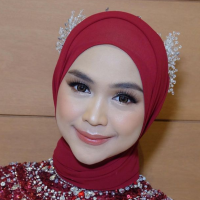

Gambar 2: Medium (Probabilitas: 0.00, 1.00, 0.00)


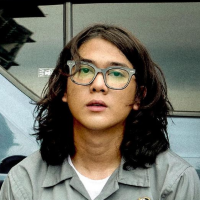

Gambar 3: Tan (Probabilitas: 0.00, 0.07, 0.93)


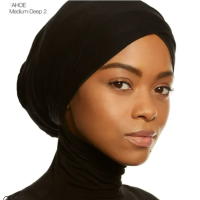

In [9]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

train_data_dir = '../ML/ML fix/dataset 3 Cat/train/'
image_size = (200, 200)
batch_size = 32

# Preproc
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=0.2)  # Bagi dataset menjadi 2:8
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',  
    subset='validation'
)

# model
model = keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax') 
])

# Kompilasi model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  
              metrics=['accuracy'])

# train model
model.fit(train_generator, epochs=100, validation_data=validation_generator)

# prediksi gambar pada test
test_data_dir = '../ML/ML fix/dataset 3 Cat/test/'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=image_size,
    batch_size=1,
    class_mode='categorical', 
    shuffle=False
)

predictions = model.predict(test_generator)
from IPython.display import Image, display

# for i, prediction in enumerate(predictions):
#     predicted_class = np.argmax(prediction)
#     if predicted_class == 0:
#         print(f'Gambar {i+1}: Fair ({prediction[0]:.2f})')
#     elif predicted_class == 1:
#         print(f'Gambar {i+1}: Medium ({prediction[1]:.2f})')
#     elif predicted_class == 2:
#         print(f'Gambar {i+1}: Tan ({prediction[2]:.2f})')

#     image_path = os.path.join(test_data_dir, test_generator.filenames[i])
#     display(Image(filename=image_path))

class_labels = {0: 'Fair', 1: 'Medium', 2: 'Tan'}

for i, prediction in enumerate(predictions):
    predicted_class = np.argmax(prediction)
    class_name = class_labels[predicted_class]
    print(f'Gambar {i+1}: {class_name} (Probabilitas: {prediction[0]:.2f}, {prediction[1]:.2f}, {prediction[2]:.2f})')
    image_path = os.path.join(test_data_dir, test_generator.filenames[i])
    display(Image(filename=image_path))